# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Exploratory Data Analysis in Python</h1>

How do we get from data to answers? Exploratory data analysis is a process for exploring datasets, answering questions, and visualizing results. This course presents the tools you need to clean and validate data, to visualize distributions and relationships between variables, and to use regression models to predict and explain. You'll explore data related to demographics and health, including the National Survey of Family Growth and the General Social Survey. But the methods you learn apply to all areas of science, engineering, and business. You'll use Pandas, a powerful library for working with data, and other core Python libraries including NumPy and SciPy, StatsModels for regression, and Matplotlib for visualization. With these tools and skills, you will be prepared to work with real data, make discoveries, and present compelling results.

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [1. Read, clean, and validate](#1)
    - DataFrames and Series
    - Clean and Validate
    - Filter and Visualize

* [2. Distributions](#2) 
    - Probability mass functions
    - Cumulative distribution functions
    - Comparing distributions
    - Modeling distributions
    
* [3. Relationships](#3)
    - Exploring relationships
    - Visualizing relationships
    - Correlations
    - Simple regression
    
* [4. Multivariate Thinking](#4)
    - Limits of simple regression
    - Multiple regression
    - Visualizing regression results
    - Logistic regression

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- Begin by calculating the number of rows and columns and displaying the names of columns for each DataFrame. Change any column names for better readability.
- Experiment and compute a correlation matrix for variables in `nsfg`.
- Compute the simple linear regression of `WTKG3` (weight) and `HTM4` (height) in `brfss` (or any other variables you are interested in!). Then, compute the line of best fit and plot it. If the fit doesn't look good, try a non-linear model.

In [85]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

# Importing the course datasets
brfss = pd.read_hdf('datasets/brfss.hdf5', 'brfss') # Behavioral Risk Factor Surveillance System (BRFSS) 
gss = pd.read_hdf('datasets/gss.hdf5', 'gss') # General Social Survey (GSS) 
nsfg = pd.read_hdf('datasets/nsfg.hdf5', 'nsfg') # National Survey of Family Growth (NSFG)

## <a id="1"></a>
<font color="lightseagreen" size=+2.5><b>1. Read, clean and validate</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

The first step of almost any data project is to read the data, check for errors and special cases, and prepare data for analysis. This is exactly what you'll do in this chapter, while working with a dataset obtained from the National Survey of Family Growth.

### 1 01 Dataframes and Series

1. Dataframes and Series

Welcome to Exploratory Data Analysis in Python! I'm Allen Downey and I'll be your instructor. The goal of exploratory data analysis is to use data to answer questions and guide decision making.

2. Using data to answer questions

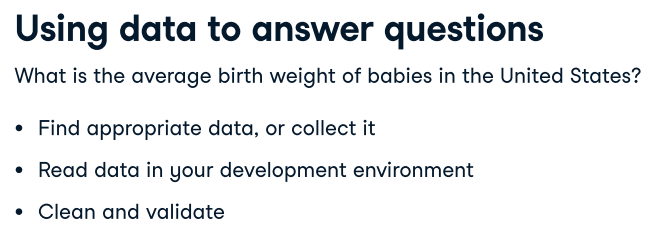

As a first example, we'll start with a simple question: what is the average birth weight of babies in the United States? To answer a question like this, we have to find an appropriate dataset or run an experiment to collect it. Then we have to get the data into our development environment and prepare it for analysis, which involves cleaning and validation.

3. National Survey of Family Growth (NSFG)

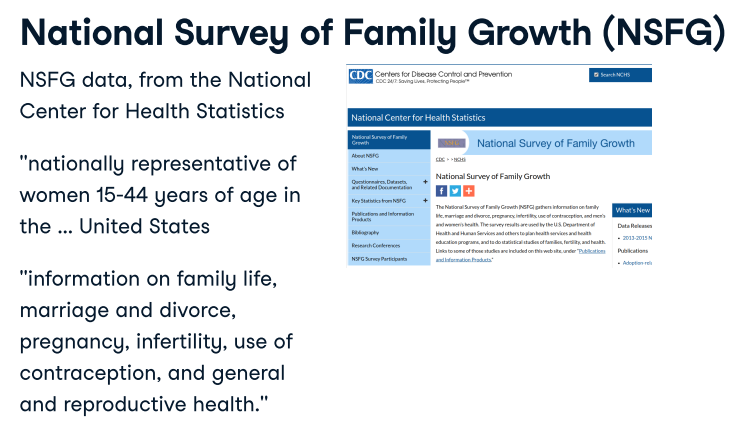

For this question we'll use data from the National Survey of Family Growth, which is available from the National Center for Health Statistics. The 2013-2015 dataset includes information about a representative sample of women in the U.S. and their children.

4. Reading data

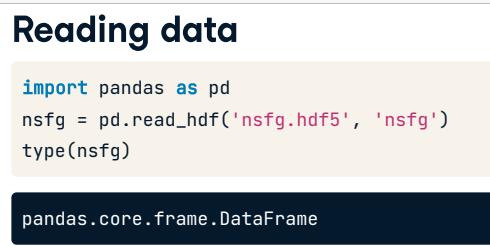

The Python module we'll use to read and analyze data is Pandas, which we'll import as `pd`. Pandas can read data in most common formats, including CSV, Excel, and the format the NSFG data is in, HDF5. The result from read_hdf() is a DataFrame, which is the primary data structure Pandas uses to store data.

5. Reading data

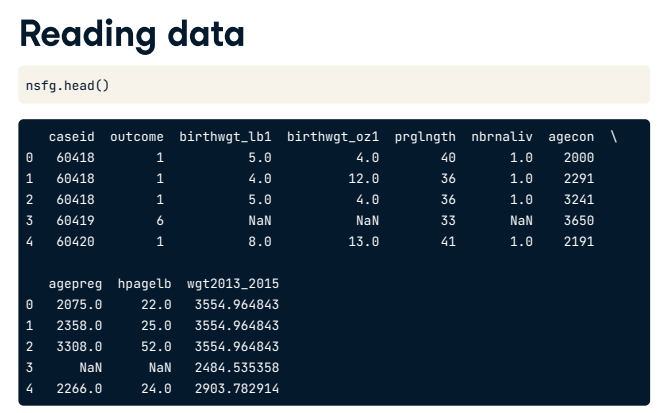

head() shows the first 5 rows of the DataFrame, which contains one row for each pregnancy for each of the women who participated in the survey, and one column for each variable.

6. Columns and rows

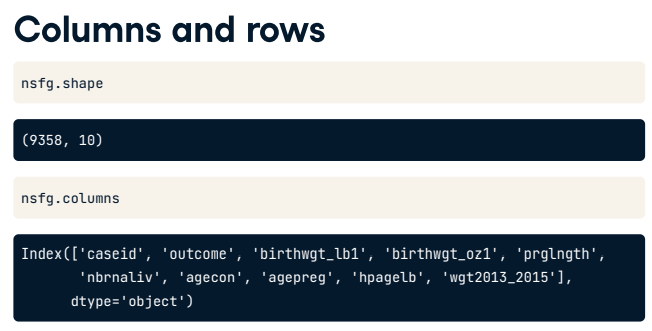

The DataFrame has an attribute called shape, which is the number of rows and columns; there are 9358 rows in this dataset, one for each pregnancy, and 10 columns, one for each variable. The DataFrame also has an attribute called `columns`, which is an Index. That's another Pandas data structure, similar to a list; in this case it's a list of variables names, which are strings. Based on the names, you might be able to guess what some of the variables are, but in general you have to read the documentation.

7. Columns and rows

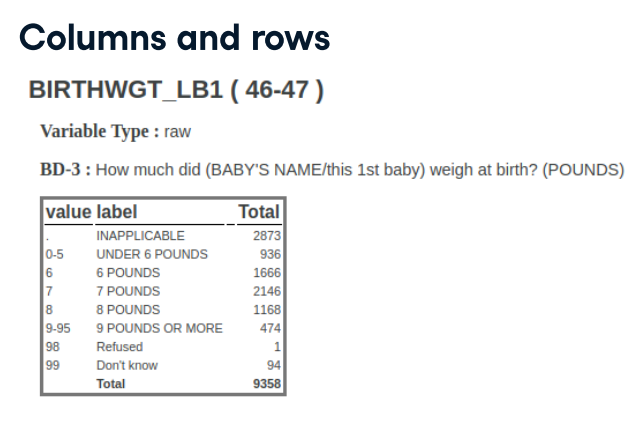

This figure shows an entry from the codebook for birthwgt_lb1, which is the weight in pounds of the first baby from this pregnancy, for cases of live birth.

8. Each column is a Series

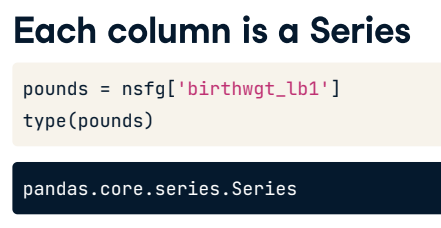

In many ways a DataFrame is like a Python dictionary, where the variable names are the keys and the columns are the values. You can select a column from a DataFrame using the bracket operator, with a string as the key. The result is a Series, which is another Pandas data structure. In this case the Series contains the birth weights, in pounds, of the live births (or in the case of multiple births, the first baby).

9. Each column is a series

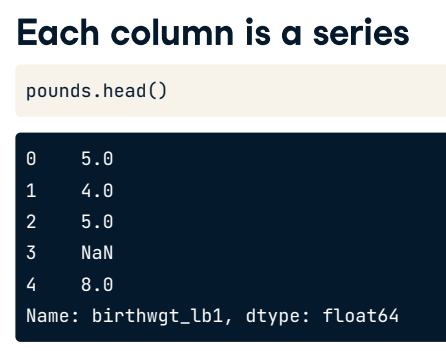

head() shows the first five values in the series, the name of the series, and the datatype; float64 means that these values are 64-bit floating-point numbers. Notice that one of the values is NaN, which stands for "Not a Number". NaN is a special value that can indicate invalid or missing data. In this example, the pregnancy did not end in live birth, so birth weight is inapplicable.

10. Let's start exploring!

Let's start exploring this data by working on some exercises.

**Read the codebook**

When you work with datasets like the NSFG, it is important to read the documentation carefully. If you interpret a variable incorrectly, you can generate nonsense results and never realize it. So before you start coding, you'll need to get familiar with the NSFG codebook, which describes every variable.

Here is the documentation from the NSFG codebook for "BIRTHWGT_OZ1":

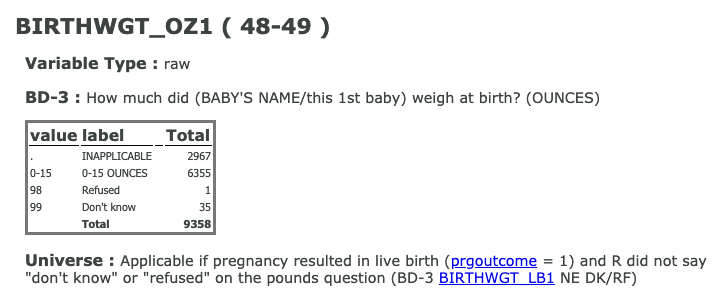

How many respondents refused to answer this question?

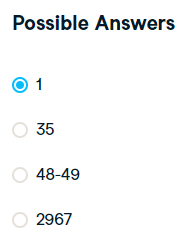

You got it. Remember, the codebook is your friend!

**Exercise**

**Exploring the NSFG data**

To get the number of rows and columns in a DataFrame, you can read its shape attribute.

To get the column names, you can read the columns attribute. The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data! It has been pre-loaded for you into a DataFrame called nsfg.

**Instructions**

- Calculate the number of rows and columns in the DataFrame nsfg.
- Display the names of the columns in nsfg.
- Select the column 'birthwgt_oz1' and assign it to a new variable called ounces.
- Display the first 5 elements of ounces.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

nsfg = pd.read_hdf('datasets/nsfg.hdf5', 'nsfg') # National Survey of Family Growth (NSFG)

In [87]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

In [88]:
# Display the number of rows and columns
nsfg.shape

# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [89]:
# Display the number of rows and columns
nsfg.shape

# Display the names of the columns
nsfg.columns

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

In [90]:
# Display the number of rows and columns
nsfg.shape

# Display the names of the columns
nsfg.columns

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


Nice job! Remember these attributes and methods; they are useful when you are exploring a new dataset. It's now time to check for errors and prepare the data for analysis. Keep going!

### 1 02 Clean and Validate

1. Clean and Validate

In the previous lesson, we read data from the National Survey of Family Growth and selected a column from a DataFrame. In this lesson, we'll check for errors and prepare the data for analysis.

2. Selecting columns

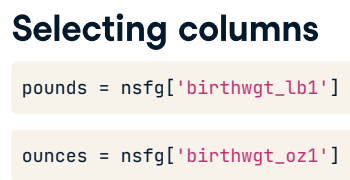

We'll use the same DataFrame we used in the previous lesson, nsfg, which contains one row for each pregnancy in the survey. I'll select the variable birthwgt_lb1, which contains the pound part of birth weight, and assign it to pounds. And birthwgt_oz1 contains the ounce part of birth weight, so I'll assign that to ounces.

3. Value counts

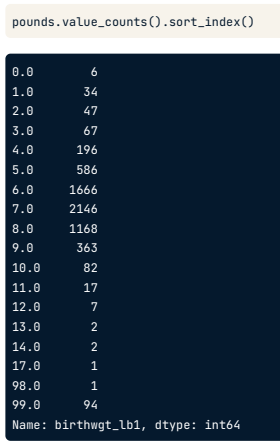

Before we do anything with this data, we have to validate it. One part of validation is confirming that we are interpreting the data correctly. We can use value_counts() to see what values appear in pounds and how many times each value appears. By default, the results are sorted with the most frequent value first, so I use sort_index() to sort them by value instead, with the lightest babies first and heaviest babies last. As we'd expect, the most frequent values are 6-8 pounds, but there are some very light babies, a few very heavy babies, and two values, 98, and 99, that indicate missing data.

4. Value counts

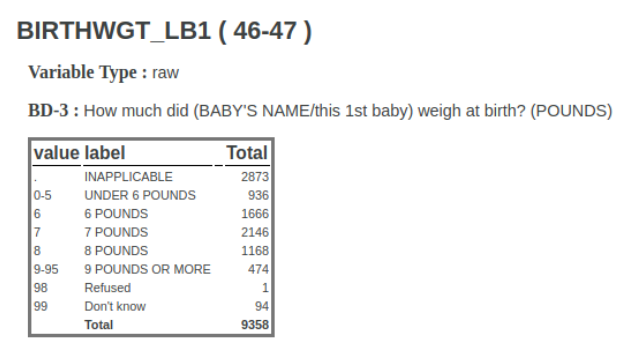

We can validate the results by comparing them to the codebook, which lists the values and their frequencies. The results here agree with the codebook, so we have some confidence that we are reading and interpreting the data correctly.

5. Describe

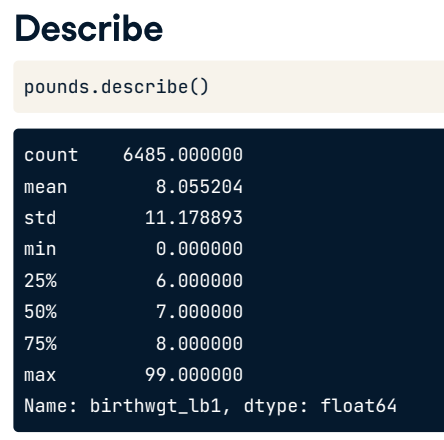

Another way to validate the data is with describe(), which computes summary statistics like the mean, standard deviation, min, and max. Here are the results for pounds. count is the number of values. The minimum and maximum values are 0 and 99, and the 50th percentile, which is the median, is 7. The mean is about 8.05, but that doesn't mean much because it includes the special values 98 and 99. Before we can really compute the mean, we have to replace those values with NaN to represent missing data.

6. Replace

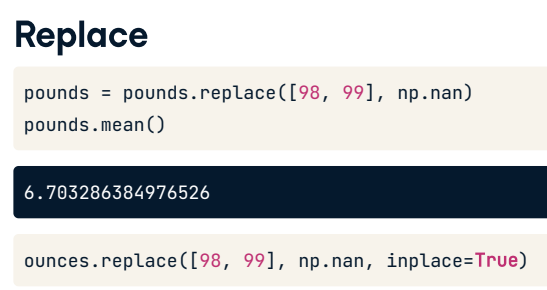

The replace() method does what we want; it takes a list of values we want to replace and the value we want to replace them with. np dot nan means we are getting the special value NaN from the NumPy library, which is imported as np. The result from replace() is a new Series, which I assign back to pounds. Remember that the mean of the original series was about 8 point 05 pounds. The mean of the new series is about 6 point 7 pounds. It makes a big difference when you remove a few 99-pound babies! Instead of making a new Series, you can call replace() with inplace=True, which modifies the existing Series "in place", that is, without making a copy. Here's what that looks like for ounces. Since we didn't make a new series, we don't have to assign it back to ounces.

7. Arithmetic with Series

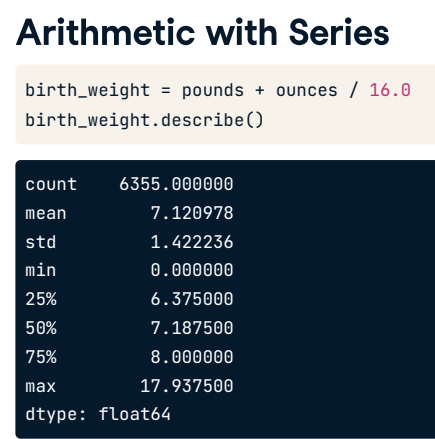

Now we want to combine pounds and ounces into a single Series that contains total birth weight. Arithmetic operators work with Series objects; so, to convert from ounces to pounds, we can divide by 16 (there are 16 ounces in a pound). Then we can add the two Series objects to get the total. Here are the results. The mean is about 7 point 1, which is a little more than what we got before we added in the ounces part. Now we're close to answering our original question, the average birth weight for babies in the U.S., but as we'll see in the next lesson, we're not there yet.

8. Let's practice!

Let's first practice what we learned in this video.

**Exercise**

**Validate a variable**

In the NSFG dataset, the variable 'outcome' encodes the outcome of each pregnancy as shown below:

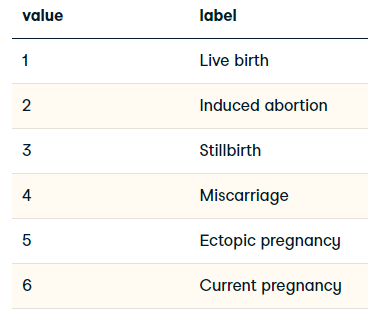

The nsfg DataFrame has been pre-loaded for you. Explore it in the IPython Shell and use the methods Allen showed you in the video to answer the following question: How many pregnancies in this dataset ended with a live birth?

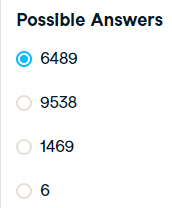

Correct! By comparing your results with the codebook, you confirm you are interpreting the data correctly.

In [91]:
nsfg["outcome"].value_counts(dropna=False)

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

**Exercise**

**Clean a variable**

In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

If you use .value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with np.nan. Recall from the video how Allen replaced the values 98 and 99 in the ounces column using the .replace() method:

ounces.replace([98, 99], np.nan, inplace=True)

**Instructions**

- In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.
- Confirm that the value 8 no longer appears in this column by printing the values and their frequencies.

In [92]:
print(nsfg['nbrnaliv'].value_counts(dropna=False))

# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts(dropna=False))

1.0    6379
NaN    2873
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64
1.0    6379
NaN    2874
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


Excellent. If you are careful about this kind of cleaning and validation, it will save time (in the long run) and avoid potentially serious errors.

**Exercise**

**Compute a variable**

For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.

Instructions

- Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg.
- Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.
- Use .describe() to compute the mean duration and other summary statistics.

In [93]:
# Select the columns and divide by 100
agecon = nsfg["agecon"] / 100
agepreg = nsfg["agepreg"] / 100

In [94]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

In [95]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


Good job. A variable that's computed from other variables is sometimes called a 'recode'. It's now time to get back to the motivating question for this chapter: what is the average birth weight for babies in the U.S.? See you in the next video!

### 1 03 Filter and Visualize

1. Filter and Visualize

Let's get back to the motivating question for this chapter: what is the average birth weight for babies in the U.S.?

2. Histogram

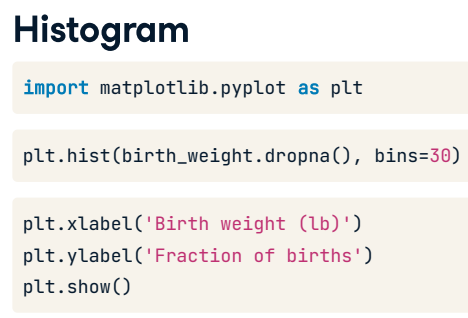

In the previous lesson, we used data from the NSFG to compute birth weight in pounds and we stored the result in a Series called birth_weight. Let's see what the distribution of those values looks like. We'll use the pyplot submodule from the matplotlib visualization library, which we import as plt. Pyplot provides hist(), which takes a Series and plots a histogram; that is, it shows the values and how often they appear. However, pyplot doesn't work with NaNs, so we have to use dropna(), which makes a new Series that contains only the valid values. The second argument, bins, tells hist to divide the range of weights into 30 intervals, called "bins", and count how many values fall in each bin. hist() takes other arguments that specify the type and appearance of the histogram; you will have a chance to explore these options in the next exercise. To label the axes we'll use xlabel() and ylabel(), and finally, to display the plot, we'll use plt dot show().

3. Histogram

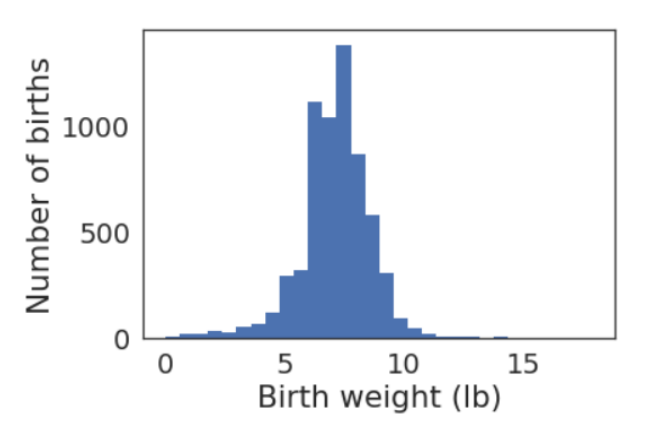

And here's what the results look like. The x-axis is birth weight in pounds, divided into 30 bins. The y-axis is the number of births in each bin. The distribution looks a little like a bell curve, but the tail is longer on the left than on the right; that is, there are more light babies than heavy babies. That makes sense because the distribution includes some babies that were born preterm. The most common duration for pregnancy is 39 weeks, which is "full term"; "preterm" is usually defined to be less than 37 weeks.

4. Boolean Series

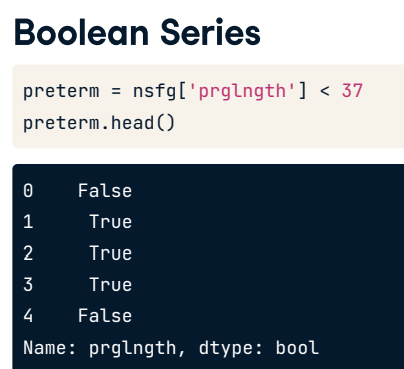

To see which babies are preterm, we can use the prglngth column, which records pregnancy length in weeks. When you compare a Series to a value, the result is a Boolean Series; that is, each element is a Boolean value, True or False. In this case, it's True for each preterm baby and False otherwise. We can use head() to see the first 5 elements.

5. Boolean Series

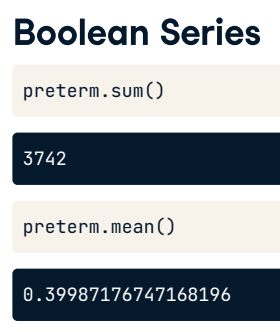

If you compute the sum of a Boolean Series, it treats True as 1 and False as 0, so the sum is the number of Trues, which is the number of preterm babies, about 3700. If you compute the mean, you get the fraction of Trues; in this case, it's close to 0.4; that is, about 40% of the births in this dataset are preterm.

6. Filtering

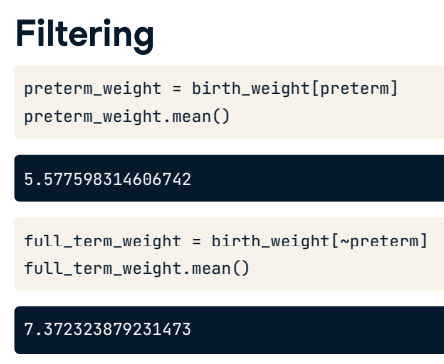

We can use a Boolean Series as a filter; that is, we can select only rows that satisfy a condition or meet some criterion. For example, we can use preterm and the bracket operator to select values from birth_weight, so preterm_weight contains birth weights for preterm babies. To select full-term babies, we can use the tilde operator, which is "logical NOT" or inverse; it makes the Trues false and the Falses true. Not surprisingly, full term babies are heavier, on average, than preterm babies.

7. Filtering

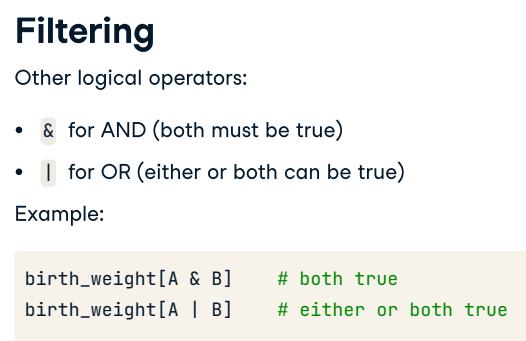

If you have two Boolean Series, you can use logical operators to combine them; ampersand is the logical AND operator, and the vertical bar or pipe is logical OR.

8. Resampling

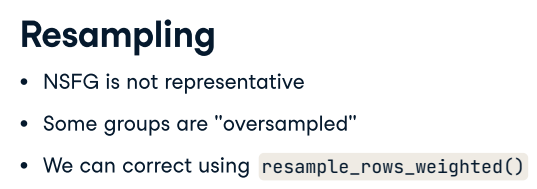

There's one more thing we have to do before we can answer our question: resampling. The NSFG is not exactly representative of the U.S. population; by design, some groups are more likely to appear in the sample than others; they are "oversampled". Oversampling helps to ensure that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated. However, we can correct for oversampling by resampling. I won't get into the details here, but I have provided a function called resample_rows_weighted() that you can use for the exercises. If you are interested in learning more about resampling, check out DataCamp's statistics courses.

9. Finish it off!

Now we have everything we need to answer the motivating question. Let's get to it.

**Exercise**

**Make a histogram**

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype - which you can read more about [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) in the matplotlib documentation. Learning how to read documentation is an essential skill. If you want to learn more about matplotlib, you can check out DataCamp's [Introduction to Data Visualization with Matplotlib](https://www.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib) course.

**Instructions**

- Plot a histogram of agecon with 20 bins.
- Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.

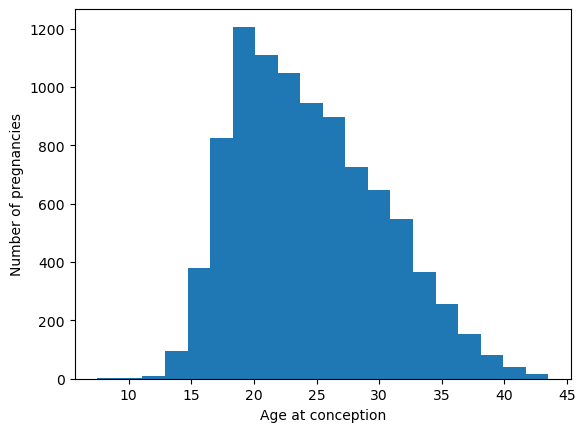

In [96]:
# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

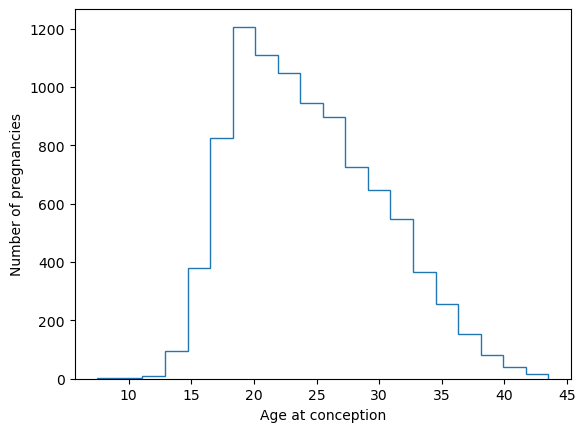

In [97]:
# Plot the histogram
plt.hist(agecon, 
         bins=20, 
         histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

Nice job! matplotlib functions provide a lot of options; be sure to read the documentation so you know what they can do.

**Exercise**

**Compute birth weight**

Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, resample_rows_weighted, that takes the NSFG data and resamples it using the sampling weights in wgt2013_2015. The result is a sample that is representative of the U.S. population.

Then I extract birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.

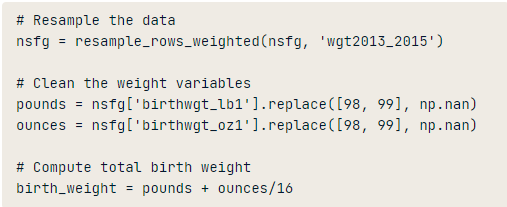

**Instructions**

- Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.
- Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.
Compute the mean weight of full-term babies.

**Exercise**

**Filter**

In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

**Instructions**

- Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.
- Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
- For comparison, select multiple, full-term babies and compute their mean birth weight.

In [98]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

Congratulations on completing Chapter 1! Now that we have clean data, we're ready to explore. Coming up in Chapter 2, we'll look at distributions of variables in the General Social Survey and explore the relationship between education and income.

## <a id="2"></a>
<font color="lightseagreen" size=+2.5><b>2. Distributions</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In the first chapter, having cleaned and validated your data, you began exploring it by using histograms to visualize distributions. In this chapter, you'll learn how to represent distributions using Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs). You'll learn when to use each of them, and why, while working with a new dataset obtained from the General Social Survey.

### 2 01 Probability mass functions

1. Probability mass functions

In the previous chapter, we used histograms to visualize distributions. In this chapter, I'll present two more ways to represent distributions and you'll learn when to use each of them. And we'll work with a new dataset.

2. GSS

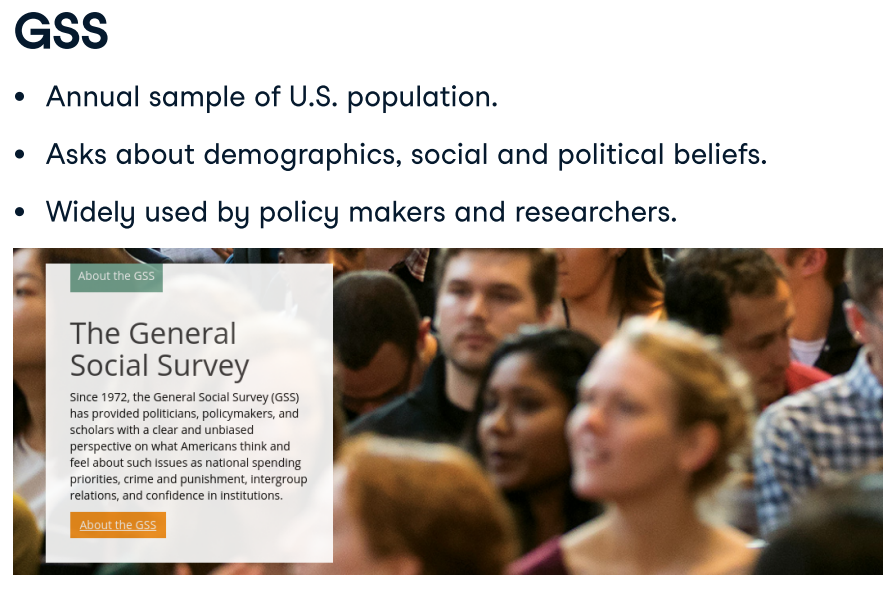

The General Social Survey, or GSS, has run annually since 1972; it surveys a representative sample of the adult population in the U.S. and asks questions about demographics and beliefs about social and political issues. It is widely used by politicians, policy makers, and researchers, including me.

3. Read the data

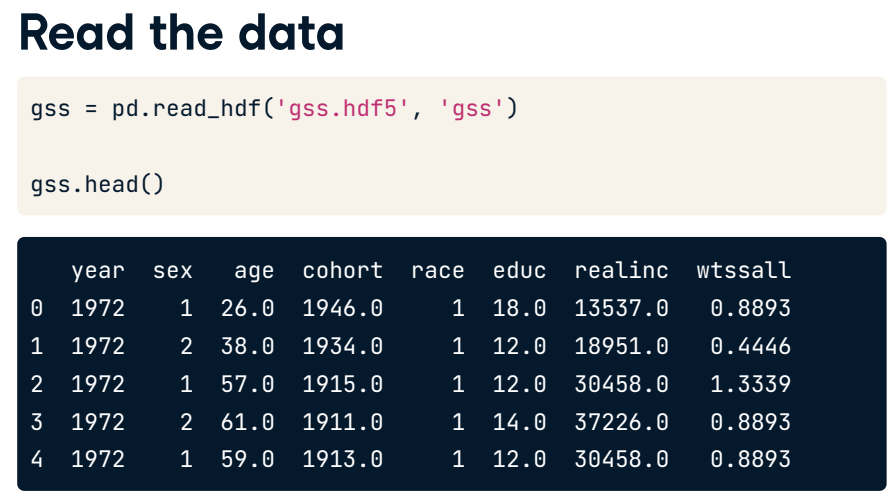

The GSS contains hundreds of variables; I've selected just a few. And I have already cleaned and validated them, so we just have to read the file, like this. If you run gss dot head(), you can see the first few rows.

4. Histogram

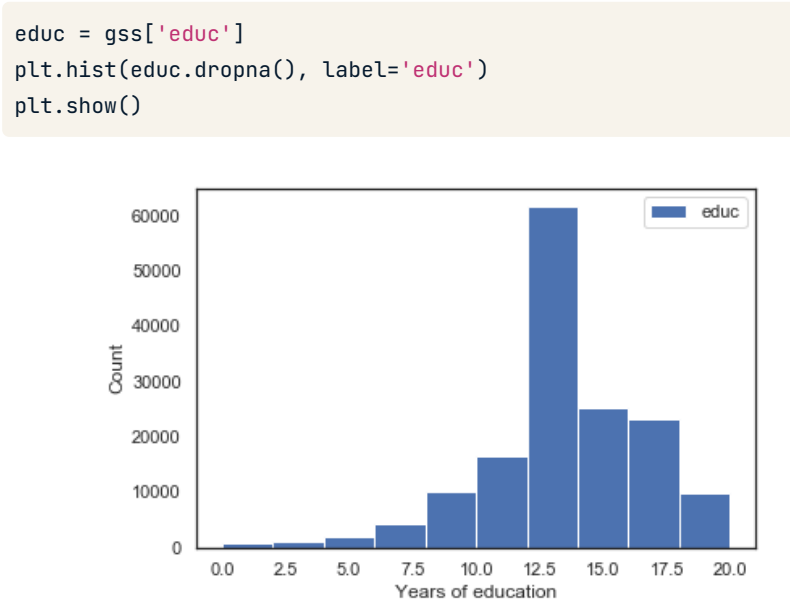

To get started with this dataset, let's look at the distribution of educ, which records the number of years of education for each respondent. First I'll select a column from the DataFrame. We've already seen one way to visualize a distribution, a histogram. Here's the code that generates it, and here's the histogram for this variable. Based on the histogram, we can see the general shape of the distribution and the central tendency - it looks like the peak is near 12 years of education. But a histogram is not the best way to visualize this distribution.

5. PMF

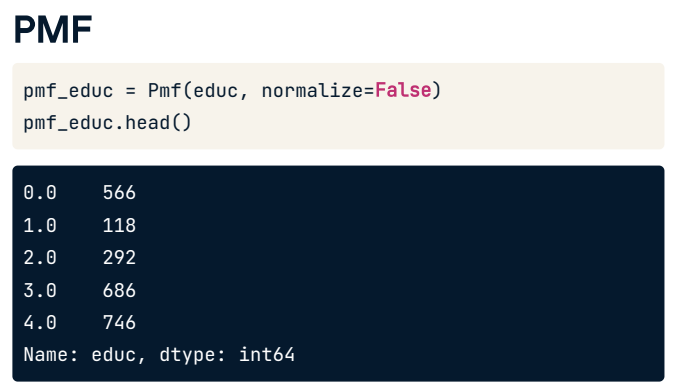

An alternative is a probability mass function, or PMF, that contains the unique values in the dataset and how often each one appears. I've provided a class called Pmf that computes a probability mass function. This class is based on a Pandas Series and it provides some methods that aren't in Pandas. The first argument can be any kind of sequence; in this case, it's a Series object. The second argument indicates that we don't want to normalize this PMF. I'll explain what that means soon. The result is a Series that contains the values on the left and the counts on the right. In this dataset, there are 566 respondents who report that they have zero years of formal education.

6. PMF

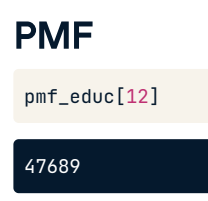

You can use the bracket operator to look up a value in a Pmf and get a count. This example shows that there are 47689 respondents with 12 years of education, which is the most frequent value.

7. Normalize

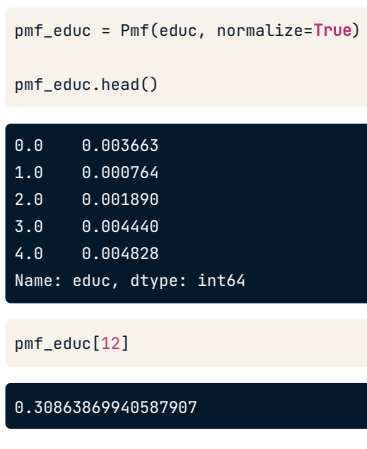

Usually when we make a PMF, we want to know the fraction of respondents with each value, rather than the counts. We can do that by setting normalize=True; then we get a normalized PMF, that is, a PMF where the frequencies add up to 1. Now if we use the bracket operator, the result is a fraction. In this example, the fraction of people with 12 years of education is 0.3086, a little more than 30%.

8. Plot

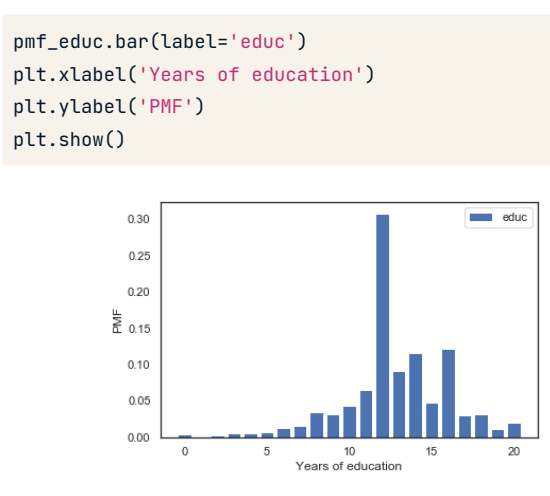

The Pmf class provides a bar() method that plots a PMF as a bar chart. And here's what it looks like. In this figure, we can see more clearly that the most common value is 12 years, but there are also peaks at 14 and 16, which correspond to two and four years of college.

9. Histogram vs. PMF

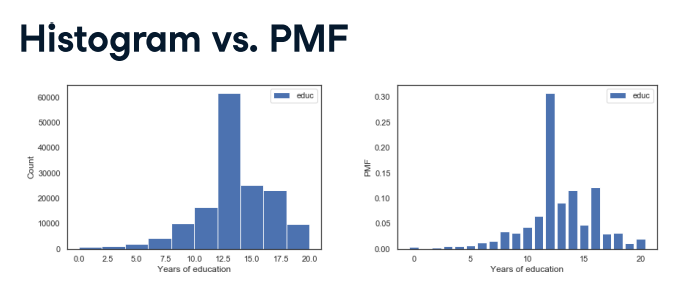

For this data, the PMF is probably a better choice than the histogram. The PMF shows all unique values, so we can see exactly where the peaks are. Because the histogram puts values into bins, it obscures some details. In this example, we can't see the peaks at 14 and 16 years.

10. Let's make some PMFs!

PMFs have limitations, too, as we'll see in the next lesson. But first, let's get some practice with PMFs.

**Exercise**

**Make a PMF**

The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed.

The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the [empiricaldist](https://pypi.org/project/empiricaldist/) library.

**Instructions**

- Make a PMF for year with normalize=False and display the result.
- Question . How many respondents were interviewed in 2016?

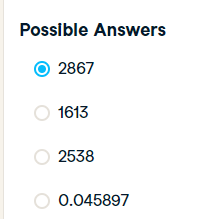

Correct. The PMF makes it easy to extract insights like this. Time now to visualize the PMF for the 'age' variable of this GSS dataset!

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

gss = pd.read_hdf('datasets/gss.hdf5', 'gss') # General Social Survey (GSS) 

In [100]:
gss.head()

year   age  cohort  sex  race  educ  realinc  gunlaw  grass  wtssall
0  1972  26.0  1946.0    1     1  18.0  13537.0     2.0    NaN   0.8893
1  1972  38.0  1934.0    2     1  12.0  18951.0     1.0    NaN   0.4446
2  1972  57.0  1915.0    1     1  12.0  30458.0     1.0    NaN   1.3339
3  1972  61.0  1911.0    2     1  14.0  37226.0     1.0    NaN   0.8893
4  1972  59.0  1913.0    1     1  12.0  30458.0     2.0    NaN   0.8893

In [101]:
# !pip install empiricaldist

In [102]:
import empiricaldist

In [103]:
help(empiricaldist)

Help on package empiricaldist:

NAME
    empiricaldist

PACKAGE CONTENTS
    empiricaldist
    test_empiricaldist

FILE
    c:\users\toshiba\anaconda3\lib\site-packages\empiricaldist\__init__.py




In [104]:
dir(empiricaldist)

['Cdf',
 'Distribution',
 'Hazard',
 'Pmf',
 'Surv',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'empiricaldist',
 'interp1d',
 'np',
 'pd',
 'plt',
 'underride']

In [105]:
from empiricaldist import Pmf

In [106]:
help(Pmf)

Help on class Pmf in module empiricaldist.empiricaldist:

class Pmf(Distribution)
 |  Pmf(*args, **kwargs)
 |  
 |  Represents a probability Mass Function (PMF).
 |  
 |  Method resolution order:
 |      Pmf
 |      Distribution
 |      pandas.core.series.Series
 |      pandas.core.base.IndexOpsMixin
 |      pandas.core.arraylike.OpsMixin
 |      pandas.core.generic.NDFrame
 |      pandas.core.base.PandasObject
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.indexing.IndexingMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__ = add(self, x, **kwargs)
 |  
 |  __div__ = div(self, x, **kwargs)
 |  
 |  __mul__ = mul(self, x, **kwargs)
 |  
 |  __radd__ = add(self, x, **kwargs)
 |  
 |  __rdiv__ = div(self, x, **kwargs)
 |  
 |  __rmul__ = mul(self, x, **kwargs)
 |  
 |  __rsub__ = sub(self, x, **kwargs)
 |  
 |  __rtruediv__ = div(self, x, **kwargs)
 |  
 |  __sub__ = sub(self, x, **kwargs)
 |  
 |  __truediv__ = div(self, x, **kwargs)
 |  
 |  ad

In [108]:
# # Compute the PMF for year
# pmf_year = Pmf(gss["year"], normalize=False)

# # Print the result
# print(pmf_year)

# TypeError: __init__() got an unexpected keyword argument 'normalize'

In [109]:
gss["year"].value_counts(dropna=False).sort_index()

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: year, dtype: int64

In [110]:
gss["year"].value_counts(dropna=False, normalize=True).sort_index()

1972    0.025822
1973    0.024077
1974    0.023757
1975    0.023853
1976    0.023997
1977    0.024493
1978    0.024525
1980    0.023501
1982    0.029776
1983    0.025598
1984    0.023581
1985    0.024557
1986    0.023533
1987    0.029120
1988    0.023709
1989    0.024605
1990    0.021964
1991    0.024285
1993    0.025710
1994    0.047898
1996    0.046489
1998    0.045337
2000    0.045097
2002    0.044264
2004    0.045016
2006    0.072199
2008    0.032386
2010    0.032722
2012    0.031601
2014    0.040630
2016    0.045897
Name: year, dtype: float64

**Exercise**

**Plot a PMF**

Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in years.

**Instructions**

- Select the 'age' column from the gss DataFrame and store the result in age.
- Make a normalized PMF of age. Store the result in pmf_age.
- 

In [111]:
# Select the age column
age = gss["age"]

In [112]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

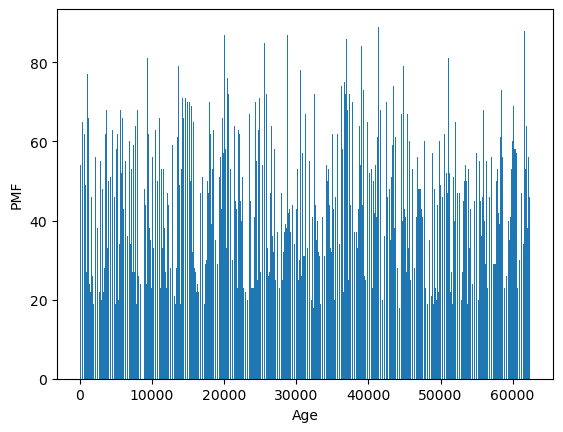

In [113]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar(label='pmf_age')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

Nice job. You could also use pmf_age.plot() to plot the Pmf as a line plot.

### 2 02 Cumulative distribution functions

1. Cumulative distribution functions

In the previous lesson, we saw the probability mass function, or PMF, which represents the possible values in a distribution and their probabilities. In this lesson, we'll see another way to represent a distribution, the cumulative distribution function, or CDF. CDFs are useful for some computations; they are also a great way to visualize and compare distributions.

2. From PMF to CDF

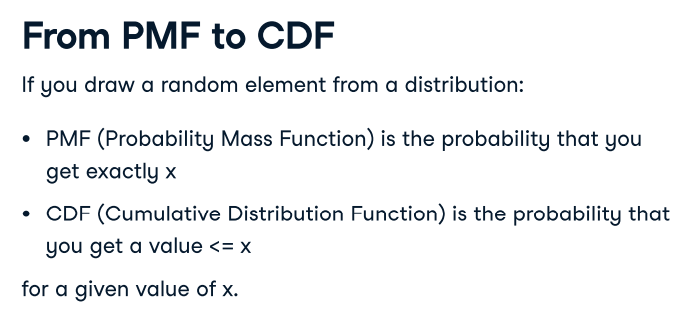

You might remember that a PMF tells you - if you draw a random value from a distribution - what's the chance of getting x, for any given value of x. The CDF is similar; if you draw a random value from a distribution, it tells you the chance of getting a value less than or equal to x.

3. Example

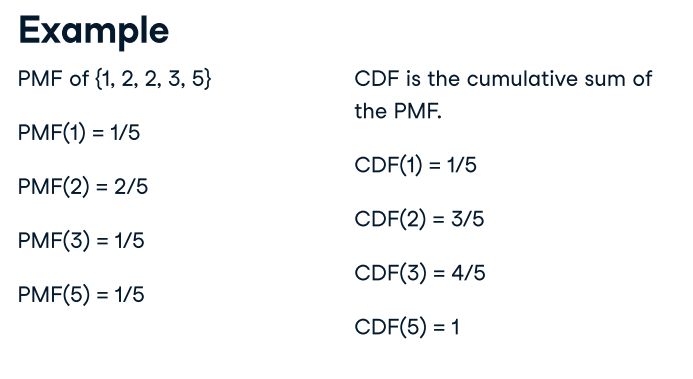

As a small example, suppose the distribution only has 5 elements, 1, 2, 2, 3, and 5. The PMF says that the probability of value 1 is 1/5; the probability of value 2 is 2/5, and the probabilities for 3 and 5 are 1/5. The CDF is the cumulative sum of the probabilities from the PMF. For example, the CDF of 2 is three fifths, because three out of 5 values in the distribution are less than or equal to 2. The CDF of 5 is 1, or 100%, because all of the values in the distribution are less than or equal to 5.

4. Make and plot a CDF

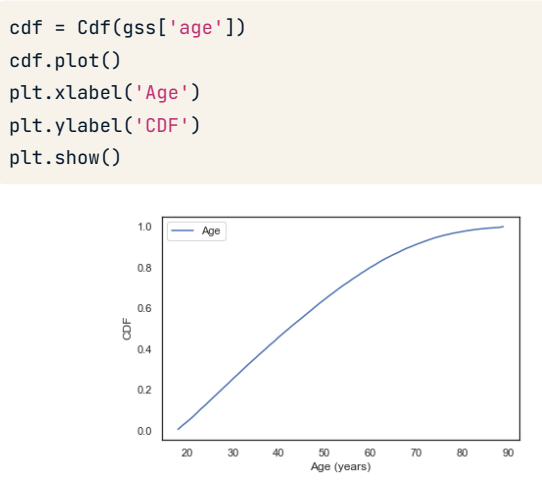

In the code for this course, I provide a Cdf class which is similar to the Pmf class we've seen. As a function, Cdf takes any kind of sequence and returns a new Cdf object. In this example, the sequence is the ages of respondents in the General Social Survey. The Cdf provides plot, which plots the CDF as a line. Here's what it looks like. The x-axis is the ages, from 18 to 89. The y-axis is the cumulative probabilities, from 0 to 1.

5. Evaluating the CDF

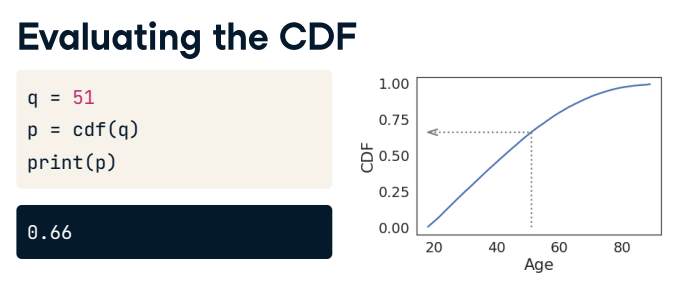

The Cdf object can be used as a function, so if you give it an age, it returns the corresponding probability. In this example, the age is the quantity, q, which is 51. The corresponding probability is p, which is 0.66. That means that about 66% of the respondents are 51 years old or younger. The arrow in the figure shows how you could read this value from the CDF, at least approximately.

6. Evaluating the inverse CDF

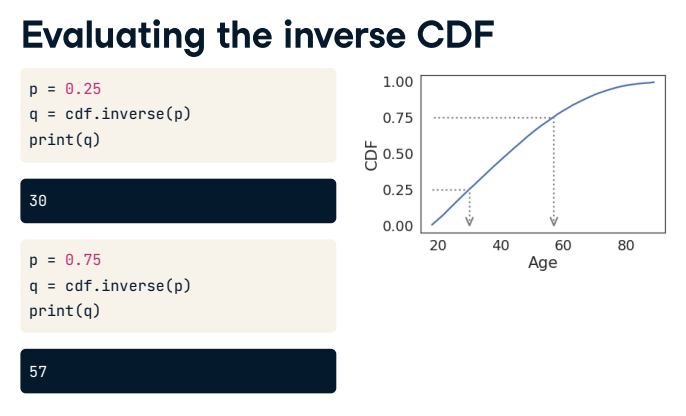

The CDF is an invertible function, which means that if you have a probability, p, you can look up the corresponding quantity, q. In this example, I look up the probability 0.25, which returns 30. That means that 25% of the respondents are age 30 or less. Another way to say the same thing is "age 30 is the 25th percentile of this distribution". I also look up probability 0.75, which returns 57, so 75% of the respondents are 57 or younger. Again, the arrows in the figure show how you could read these values from the CDF. By the way, the distance from the 25th to the 75th percentile is called the interquartile range, or IQR. It measures the spread of the distribution, so it is similar to standard deviation or variance. Because it is based on percentiles, it doesn't get thrown off by extreme values or outliers, the way variance does. So IQR can be more "robust" than variance, which means it works well even if there are errors in the data or extreme values.

7. Let's practice!

In the next lesson, we'll use CDFs to compare distributions between groups. But first, you can practice making and plotting CDFs, and reading them forward and backward.

**Exercise**

**Make a CDF**

In this exercise, you'll make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.

The GSS dataset has been preloaded for you into a DataFrame called gss.

As with the Pmf class from the previous lesson, the Cdf class you just saw in the video has been created for you, and you can access it outside of DataCamp via the empiricaldist library.

**Instructions**

- Select the 'age' column. Store the result in age.
- Compute the CDF of age. Store the result in cdf_age.
- Calculate the CDF of 30.
- Question : What fraction of the respondents in the GSS dataset are OLDER than 30?

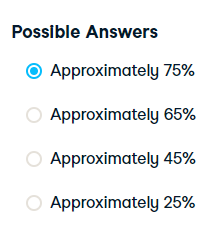

You got it. Nice job!

In [114]:
from empiricaldist import Cdf

In [115]:
help(Cdf)

Help on class Cdf in module empiricaldist.empiricaldist:

class Cdf(Distribution)
 |  Cdf(*args, **kwargs)
 |  
 |  Represents a Cumulative Distribution Function (CDF).
 |  
 |  Method resolution order:
 |      Cdf
 |      Distribution
 |      pandas.core.series.Series
 |      pandas.core.base.IndexOpsMixin
 |      pandas.core.arraylike.OpsMixin
 |      pandas.core.generic.NDFrame
 |      pandas.core.base.PandasObject
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.indexing.IndexingMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  copy(self, deep=True)
 |      Make a copy.
 |      
 |      :return: new Cdf
 |  
 |  make_hazard(self, **kwargs)
 |      Make a Hazard from the Cdf.
 |      
 |      :return: Hazard
 |  
 |  make_pmf(self, **kwargs)
 |      Make a Pmf from the Cdf.
 |      
 |      :param normalize: Boolean, whether to normalize the Pmf
 |      
 |      :return: Pmf
 |  
 |  make_same(self, dist)
 |      Convert the given dist to Cdf
 |    

In [116]:
# Select the age column
age = gss["age"]

In [117]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(gss['age'])

In [118]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

27.0


**Exercise**

**Compute IQR**

Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the 'realinc' column, and the CDF of income has already been computed and stored in cdf_income.

**Instructions**

- Calculate the 75th percentile of income and store it in percentile_75th.
- Calculate the 25th percentile of income and store it in percentile_25th.
- Calculate the interquartile range of income. Store the result in iqr.
- Question : What is the interquartile range (IQR) of income in the GSS dataset?

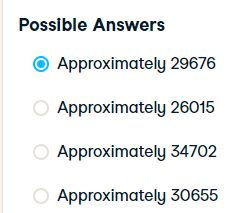

That's it. Now, just one more exercise for this lesson.

In [119]:
gss.head()

year   age  cohort  sex  race  educ  realinc  gunlaw  grass  wtssall
0  1972  26.0  1946.0    1     1  18.0  13537.0     2.0    NaN   0.8893
1  1972  38.0  1934.0    2     1  12.0  18951.0     1.0    NaN   0.4446
2  1972  57.0  1915.0    1     1  12.0  30458.0     1.0    NaN   1.3339
3  1972  61.0  1911.0    2     1  14.0  37226.0     1.0    NaN   0.8893
4  1972  59.0  1913.0    1     1  12.0  30458.0     2.0    NaN   0.8893

In [120]:
gss.describe()

year           age        cohort           sex          race  \
count  62466.000000  62281.000000  62282.000000  62466.000000  62466.000000   
mean    1994.072359     44.648320   1949.429996      1.541415      1.254955   
std       12.937941     17.072244     20.734302      0.498286      0.554694   
min     1972.000000     18.000000   1883.000000      1.000000      1.000000   
25%     1984.000000     30.000000   1935.000000      1.000000      1.000000   
50%     1994.000000     43.000000   1951.000000      2.000000      1.000000   
75%     2006.000000     57.000000   1964.000000      2.000000      1.000000   
max     2016.000000     89.000000   1998.000000      2.000000      3.000000   

               educ        realinc        gunlaw         grass       wtssall  
count  62304.000000   55499.000000  40550.000000  36222.000000  62466.000000  
mean      12.831311   34702.430164      1.237534      1.695572      1.213340  
std        3.117027   30665.659411      0.425577      0.460171      0.585544  
min        0.000000     234.000000      1.000000      1.000000      0.411898  
25%       12.000000   13750.000000      1.000000      1.000000      0.918400  
50%       12.000000   26015.000000      1.000000      2.000000      1.062100  
75%       15.000000   43426.000000      1.000000      2.000000      1.515500  
max       20.000000  162607.000000      2.000000      2.000000      8.739876

In [121]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

In [122]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

In [123]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

0.0


**Exercise**

**Plot a CDF**

The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable 'realinc' represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

**Instructions**

- Select 'realinc' from the gss dataset.
- Make a Cdf object called cdf_income.
- Create a plot of cdf_income using .plot().

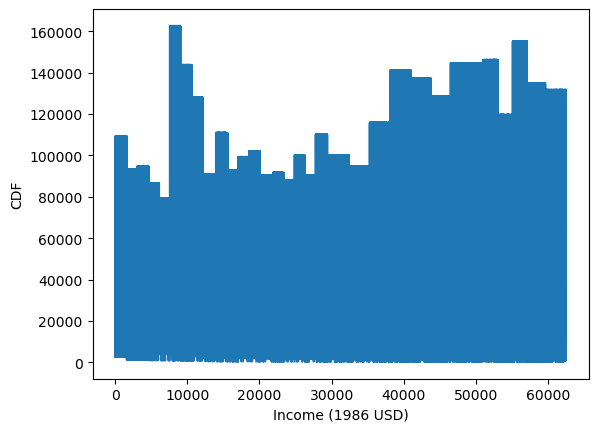

In [124]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

Excellent. You are ready for the next lesson, in which you'll learn how to compare distributions!

### 2 03 Comparing distributions

1. Comparing distributions

So far we've seen two ways to represent distributions, PMFs and CDFs. In this lesson, we'll use PMFs and CDFs to compare distributions, and we'll see the pros and cons of each.

2. Multiple PMFs

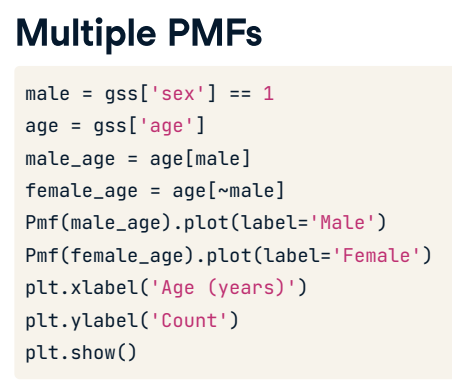

One way to compare distributions is to plot multiple PMFs on the same axes. For example, suppose we want to compare the distribution of age for male and female respondents. First I'll create a boolean Series that's true for male respondents. And I'll extract the age column. Now I can select ages for the male and female respondents. And plot a Pmf for each. Of course I always remember to label the axes!

3. Age PMFs

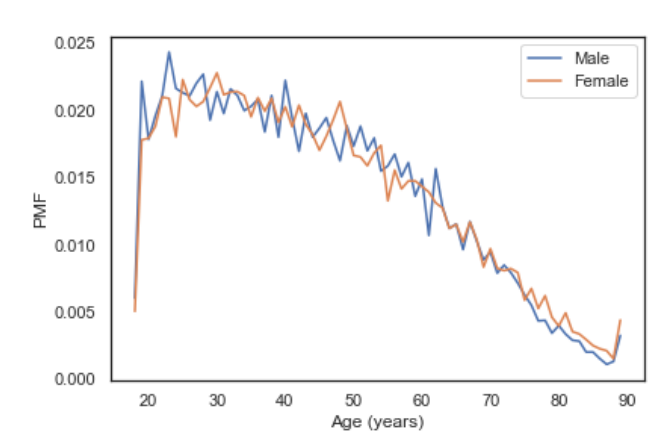

Here's the result. It looks like there are more men in their twenties, maybe. And there are more women in their 70s and 80s. In between, the plot is pretty noisy; most of these differences are just random variations.

4. Multiple CDFs

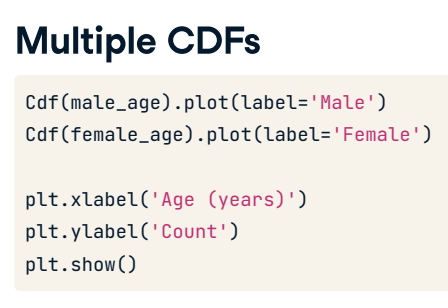

We can do the same thing with CDFs. Here's the code: everything is the same except I replaced Pmf with Cdf.

5. Age CDFs

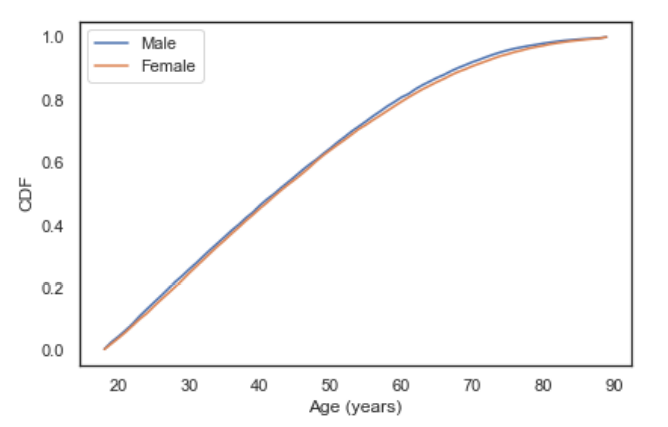

And here is the result. In general, CDFs are smoother than PMFs. Because they smooth out randomness, we can often get a better view of real differences between distributions. In this case, the lines overlap over the whole range; that is, the distributions are nearly identical. But we can see the blue line to the left of the orange line across the distribution, which shows that men are younger at every percentile. Or, another way to think of it: for every age, the fraction of men below that age is more than the fraction of women below that age. But not by very much.

6. Income distribution

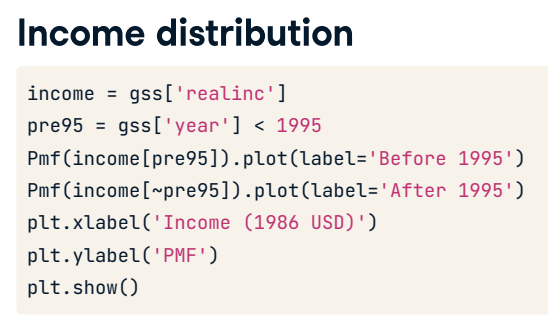

As another example, let's look at household income and compare the distribution before and after 1995 (I chose 1995 because it's roughly the midpoint of the survey). The variable realinc represents household income in 1986 dollars. I'll make a boolean Series to select respondents interviewed before 1995. Now I can plot the PMFs. And label the axes.

7. Income PMFs

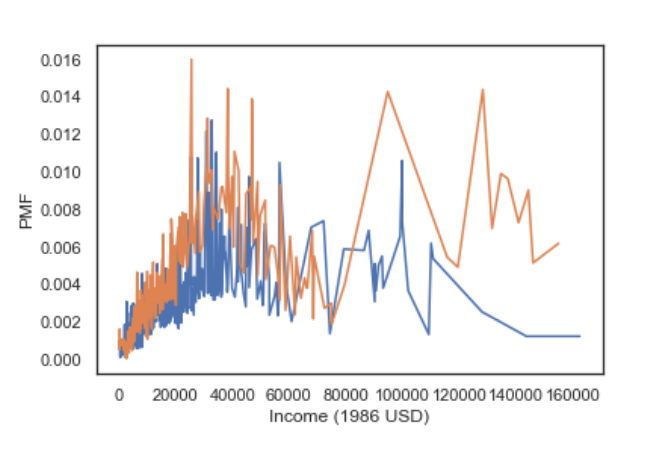

Here's what it looks like. There are a lot of unique values in this distribution, and none of them appear very often. The PMF is so noisy, we can't really see the shape of the distribution. It looks like there are more people with high incomes after 1995, but it's hard to tell. We can get a clearer picture with a CDF.

8. Income CDFs

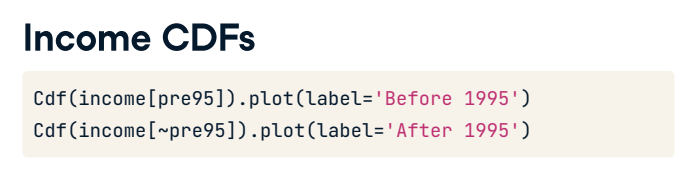

Here's the code to generate the CDFs.

9. Income CDFs

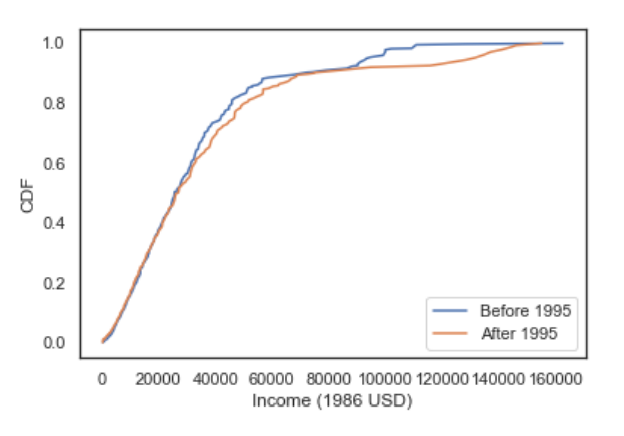

And here are the results. Below $30,000 the CDFs are almost identical; above that, we can see that the orange distribution is shifted to the right. In other words, the fraction of people with high incomes is about the same, but the income of high earners has increased.

10. Let's practice!

In general, I recommend CDFs for exploratory analysis. They give you a clear view of the distribution, without too much noise, and they are good for comparing distributions, especially if you have more than two. In the exercises for this lesson, you'll have a chance to compare incomes for respondents with different education levels.

**Exercise**

**Distribution of education**

Let's begin comparing incomes for different levels of education in the GSS dataset, which has been pre-loaded for you into a DataFrame called gss. The variable educ represents the respondent's years of education.

What fraction of respondents report that they have 12 years of education or fewer?

**Instructions**

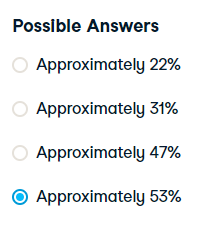

Correct. If you evaluate the CDF at 12, you get the fraction of respondents with 12 or fewer years of eduction.

In [125]:
gss.head()

year   age  cohort  sex  race  educ  realinc  gunlaw  grass  wtssall
0  1972  26.0  1946.0    1     1  18.0  13537.0     2.0    NaN   0.8893
1  1972  38.0  1934.0    2     1  12.0  18951.0     1.0    NaN   0.4446
2  1972  57.0  1915.0    1     1  12.0  30458.0     1.0    NaN   1.3339
3  1972  61.0  1911.0    2     1  14.0  37226.0     1.0    NaN   0.8893
4  1972  59.0  1913.0    1     1  12.0  30458.0     2.0    NaN   0.8893

In [126]:
# Select the age column
educ = gss['educ']

# Compute the CDF of age
cdf_educ = Cdf(educ)

# Calculate the CDF of 30
print(cdf_educ(12))

11.0


**Exercise**

**Extract education levels**

Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

**Instructions**

- Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
- Complete the line that identifies respondents with 12 or fewer years of education.
- Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.

In [127]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


Excellent. Remember, you can use logical operators to make Boolean Series and select rows from a DataFrame or Series.

**Exercise**

**Plot income CDFs**

Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:

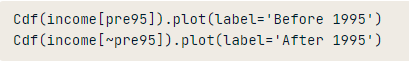

You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: high, assc, and bach.

**Instructions**
- Fill in the missing lines of code to plot the CDFs.

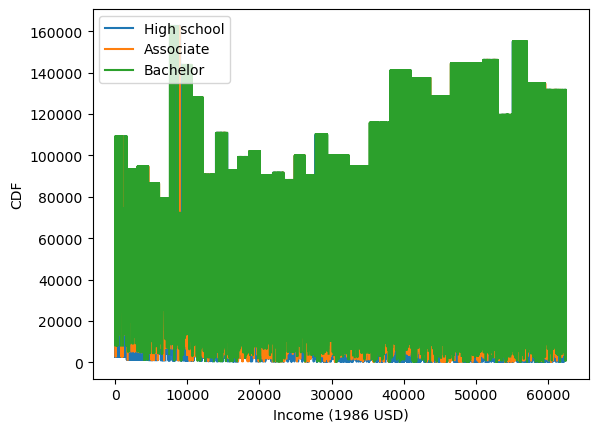

In [128]:
income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

Nice job. It might not be surprising that people with more education have higher incomes, but looking at these distributions, we can see where the differences are.

### 2 04 Modeling distributions

1. Modeling distributions

In the previous lesson we used PMFs and CDFs to plot and compare distributions. We saw that PMFs don't work very well when the data have a large number of unique values. In this lesson you'll learn about probability density functions, or PDFs, and learn how to estimate PDFs from data.

2. The normal distribution

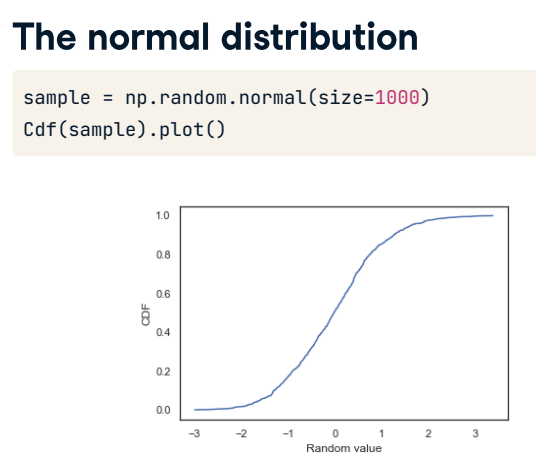

Let's start with the normal distribution, also called the Gaussian distribution. It turns out that many things we measure in the world have distributions that are well approximated by a normal distribution. To get a sense of what the normal distribution looks like, I'll use the NumPy random module to generate 1000 random values from a normal distribution. And plot their CDF. This sigmoid shape is what we expect to see with values from a normal distribution.

3. The normal CDF

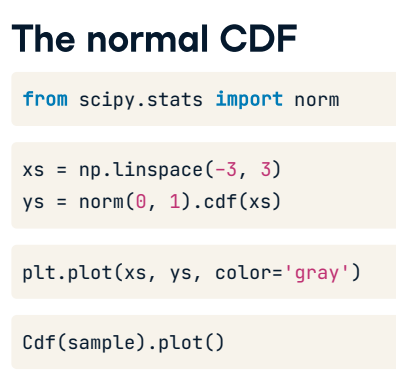

SciPy provides an object called norm that represents the normal distribution. I'll use np dot linspace() to create an array of equally-spaced points from -3 to 3. norm(0, 1) creates an object that represents a normal distribution with mean 0 and standard deviation 1. Dot cdf() evaluates the CDF of the normal distribution. I'll plot the results with a gray line. And then plot the CDF of the sample again.

4. Comparing CDFs

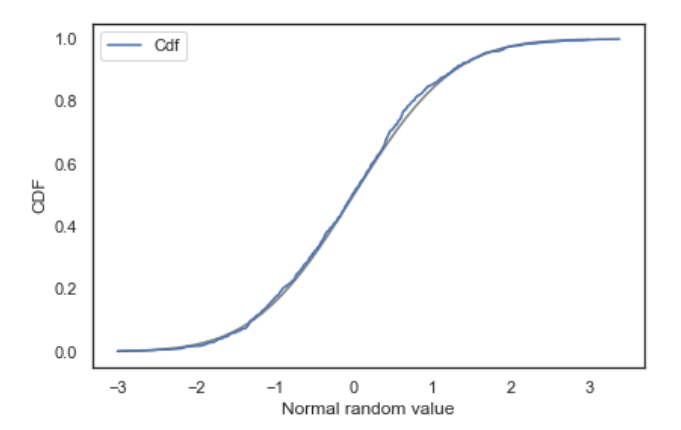

Here's the result. The CDF from the sample is pretty close to the normal CDF over the whole range. If this were real data, we would conclude that the normal distribution is a good model for the data.

5. The bell curve

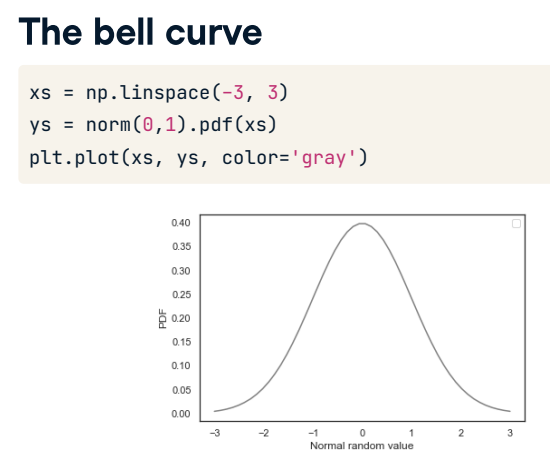

The norm object also provides dot pdf(), which evaluates the probability density function, or PDF. And here's what that looks like. It's the classic bell curve. Unfortunately, if we compare this PDF to the PMF of the sample, it doesn't work very well.

6. Sample PMF

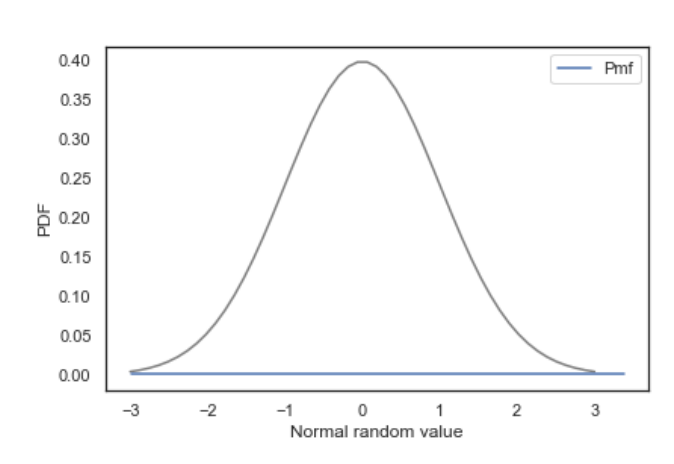

Here's what it looks like. The PMF of the sample is a flat line across the bottom. In the random sample, every value is unique, so they all have the same probability, one in 1000. However, we can use the points in the sample to estimate the PDF of the distribution they came from. This process is called kernel density estimation, or KDE. It's a way of getting from a PMF, a probability mass function, to a PDF, a probability density function.

7. KDE plot

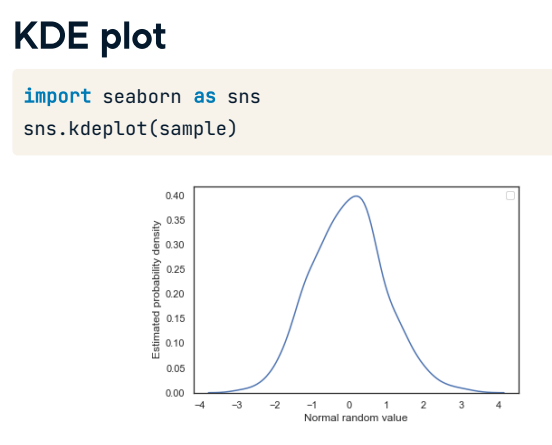

To generate a KDE plot, we'll use the Seaborn library for data visualization, which I import as sns. Seaborn provides kdeplot, which takes the sample, estimates the PDF, and plots it. Here's what it looks like.

8. KDE and PDF

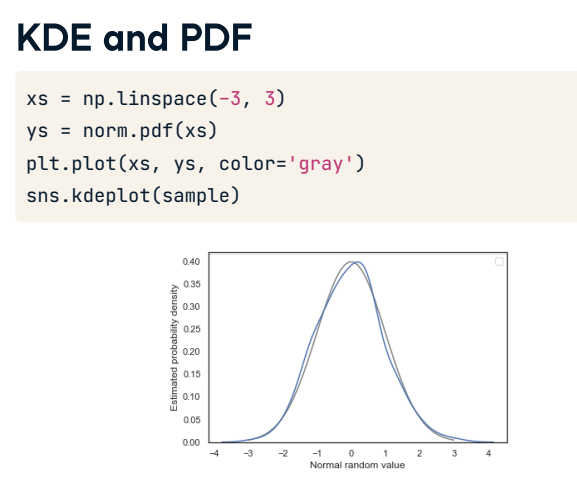

Now we can compare the KDE plot and the normal PDF. Here's the code. There's nothing there we haven't already seen. And here's the result. The KDE plot matches the normal PDF pretty well, although the differences look bigger when we compare PDFs than they did with the CDFs. On one hand, that means that the PDF is a more sensitive way to look for differences, but often it is too sensitive. It's hard to tell whether apparent differences mean anything, or if they are just random, as in this case.

9. PMF, CDF, KDE

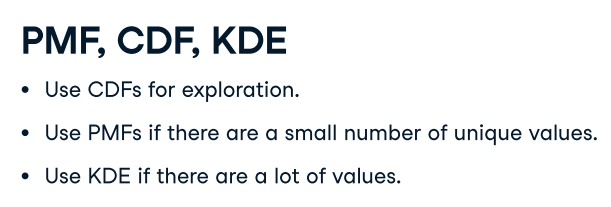

To summarize, we've seen three ways to visualize distributions, PMFs, CDFs, and KDE. In general, I use CDFs when I am exploring data. I think they give the best view of what's going on without getting distracted by noise. The biggest drawback of CDFs is that they are less well known. If I am presenting results to an audience unfamiliar with CDFs, I'll use a PMF for distributions with a small number of unique values and KDE if there are a lot of values.

10. Let's practice!

Now let's practice what we learned in this lesson.

**Exercise** 

**Distribution of income**

In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

**Instructions**

- Extract 'realinc' from gss and compute its logarithm using np.log10().
- Compute the mean and standard deviation of the result.
- Make a norm object by passing the computed mean and standard deviation to norm().

In [129]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean,std)

4.371148677933652 0.4290082383271419


Nice work. Now we can plot the model and the observed distribution and see where they differ.m

**Exercise** 

**Comparing CDFs**

To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:

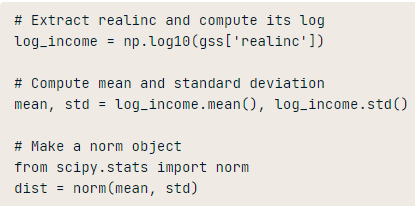

dist is a scipy.stats.norm object with the same mean and standard deviation as the data. It provides .cdf(), which evaluates the normal cumulative distribution function.

Be careful with capitalization: Cdf(), with an uppercase C, creates Cdf objects. dist.cdf(), with a lowercase c, evaluates the normal cumulative distribution function.

**Instructions**

- Evaluate the normal cumulative distribution function using dist.cdf.
- Use the Cdf() function to compute the CDF of log_income.
- Plot the result.

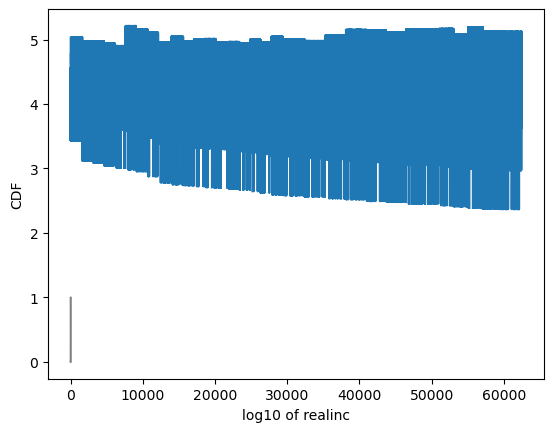

In [130]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = norm(mean, std).cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
income = gss['realinc']
log_income = np.log10(income)
Cdf(log_income).plot()

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

Good job. The lognormal model is a pretty good fit for the data, but clearly not a perfect match. That's what real data is like; sometimes it doesn't fit the model.

**Exercise**

**Comparing PDFs**

In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the norm object dist is available in your workspace:

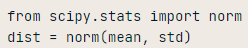

Just as all norm objects have a .cdf() method, they also have a .pdf() method.

To create a KDE plot, you can use Seaborn's kdeplot() function. Here, Seaborn has been imported for you as sns.

**Instructions**

- Evaluate the normal PDF using dist, which is a norm object with the same mean and standard deviation as the data.
- Make a KDE plot of the logarithms of the incomes, using log_income, which is a Series object.

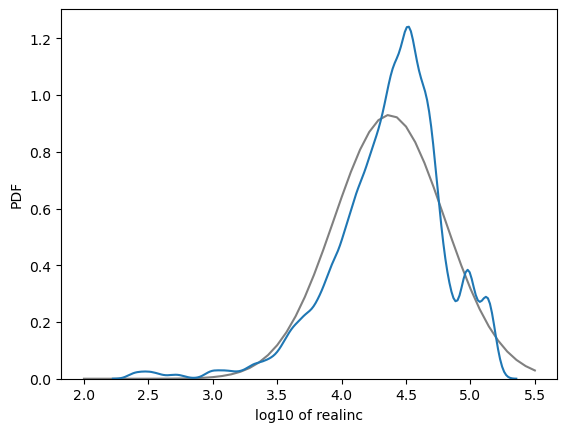

In [131]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = ys = norm(mean, std).pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
income = gss['realinc']
log_income = np.log10(income)
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

Congratulations on completing Chapter 2! We've seen several ways to vizualize and compare distributions: PMFs, CDFs, and KDE plots. In the next Chapter we'll explore relationships between variables, starting with heights and weights from a large survey of adults in the U.S. See you there!

## <a id="3"></a>
<font color="lightseagreen" size=+2.5><b>3. Relationships</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Up until this point, you've only looked at one variable at a time. In this chapter, you'll explore relationships between variables two at a time, using scatter plots and other visualizations to extract insights from a new dataset obtained from the Behavioral Risk Factor Surveillance Survey (BRFSS). You'll also learn how to quantify those relationships using correlation and simple regression.

### 3 01 Exploring relationships

1. Exploring relationships

So far we have only looked at one variable at a time. Now it's time to explore relationships between variables.

2. Height and weight

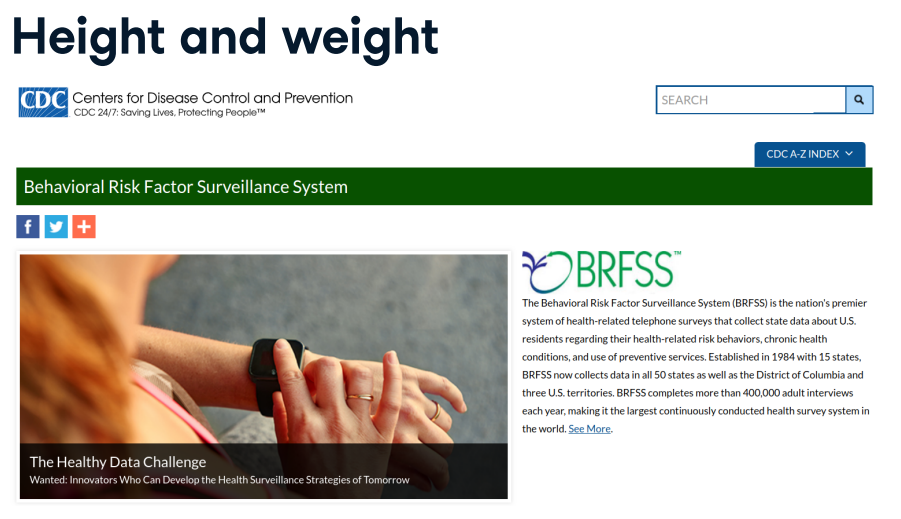

As a first example, we'll look at the relationship between height and weight. I'll use data from the Behavioral Risk Factor Surveillance Survey, or BRFSS, which is run by the Centers for Disease Control. The survey includes more than 400,000 respondents, but to keep things manageable, we'll use a random subsample of 100,000.

3. Scatter plot

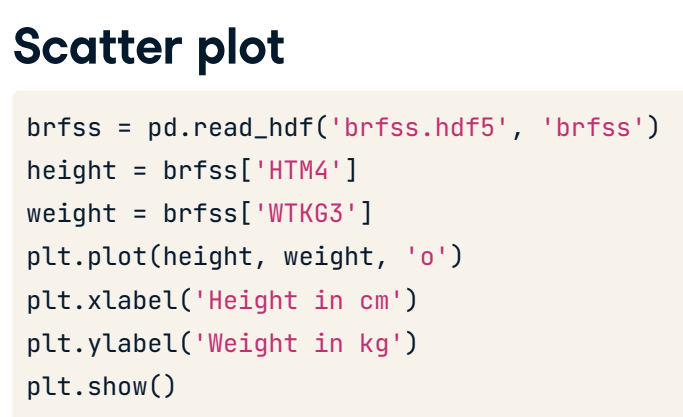

A common way to visualize the relationship between two variables is a scatter plot. Scatter plots are common and readily understood, but they are surprisingly hard to get right. To demonstrate, I'll load the BRFSS dataset and extract the variables for height in centimeters and weight in kilograms. pyplot provides a scatter() function that makes a scatter plot, but it is more versatile than we need and slower than we want. It is faster to use plot() with the format string 'o', which plots a circle for each data point. And, as always, we have to label the axes.

4. Overplotting

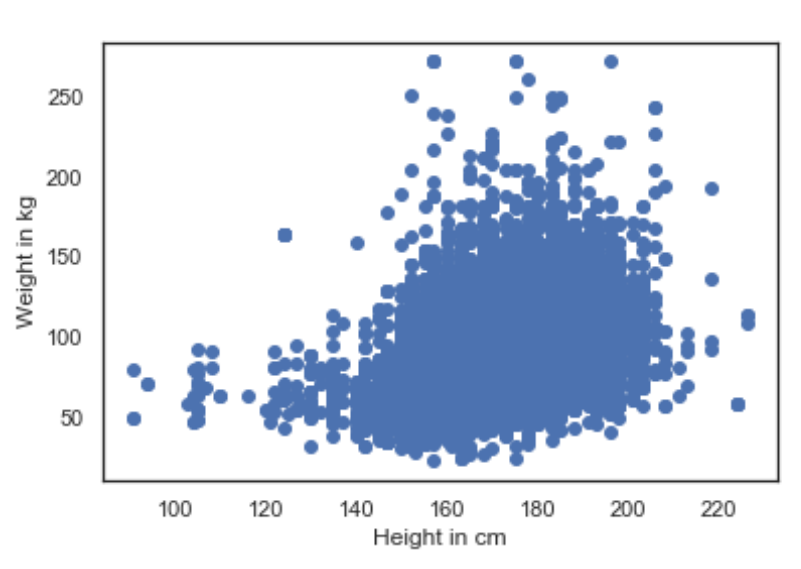

Here's what it looks like. In general, it looks like taller people are heavier, but there are a few things about this scatter plot that make it hard to interpret. Most importantly, it is "overplotted", which means that there are data points piled on top of each other so you can't tell where there are a lot of points and where there is just one. When that happens, the results can be really misleading.

5. Transparency

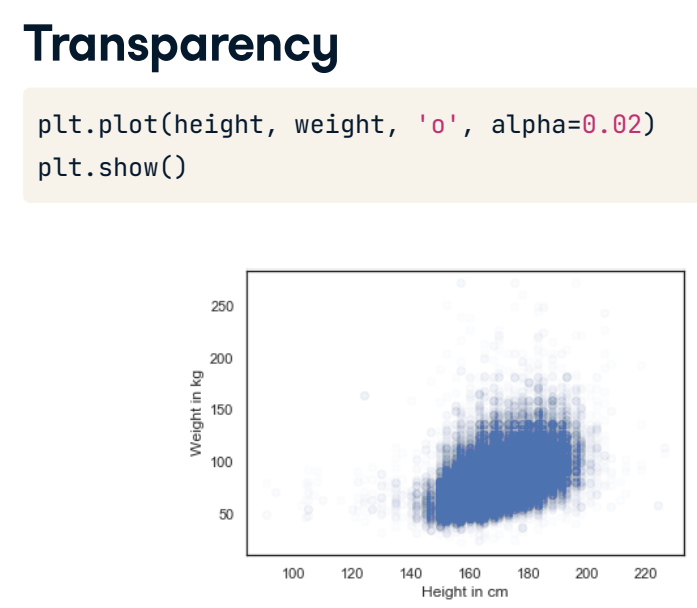

One way to improve it is to use transparency, which we can do with the alpha parameter. The lower the value of alpha, the more transparent each data point is. Here's what it looks like with alpha=0.02. This is better, but there are so many data points, the scatter plot is still overplotted. The next step is to make the markers smaller.

6. Marker size

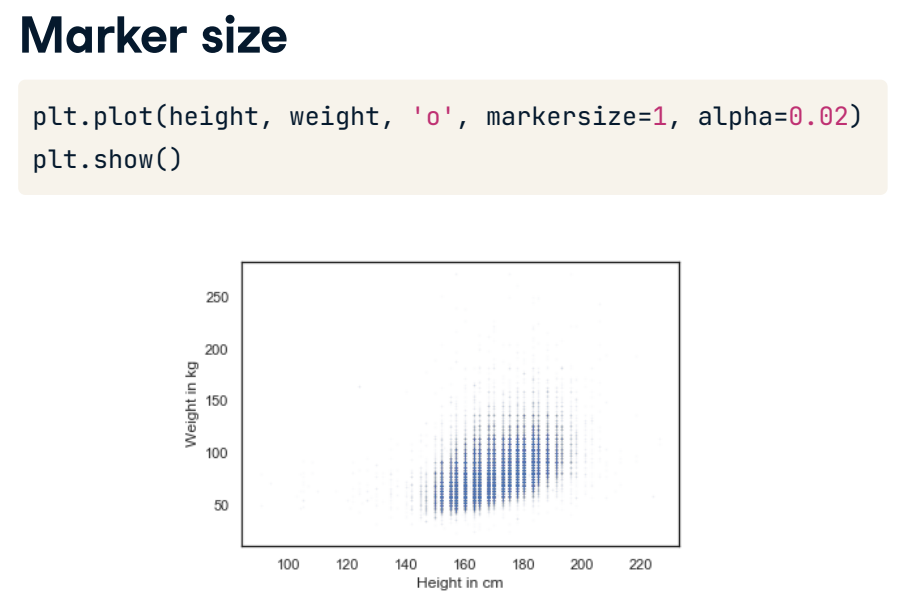

With markersize=1 and a low value of alpha, the scatter plot is less saturated. Here's what it looks like. Again, this is better, but now we can see that the points fall in discrete columns. That's because most heights were reported in inches and converted to centimeters. We can break up the columns by adding some random noise to the values; in effect, we are filling in the values that got rounded off.

7. Jittering

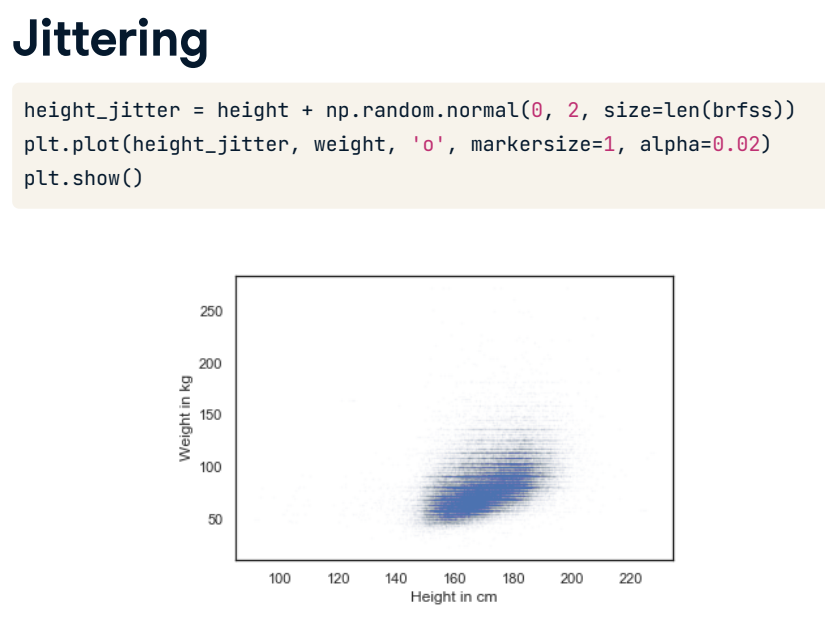

Adding random noise like this is called "jittering". In this example, I added noise with mean 0 and standard deviation 2. Here's what the plot looks like when we jitter height. The columns are gone, but now we can see that there are rows where people rounded off their weight. We can fix that by jittering weight, too.

8. More jittering

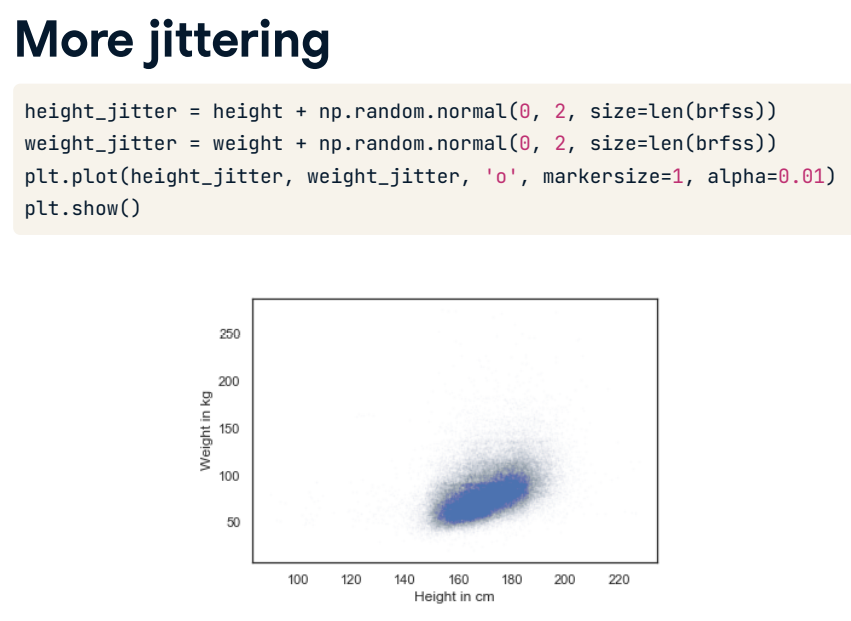

Here's the code. And here's the result. Finally, let's zoom in on the area where most of the data points are.

9. Zoom

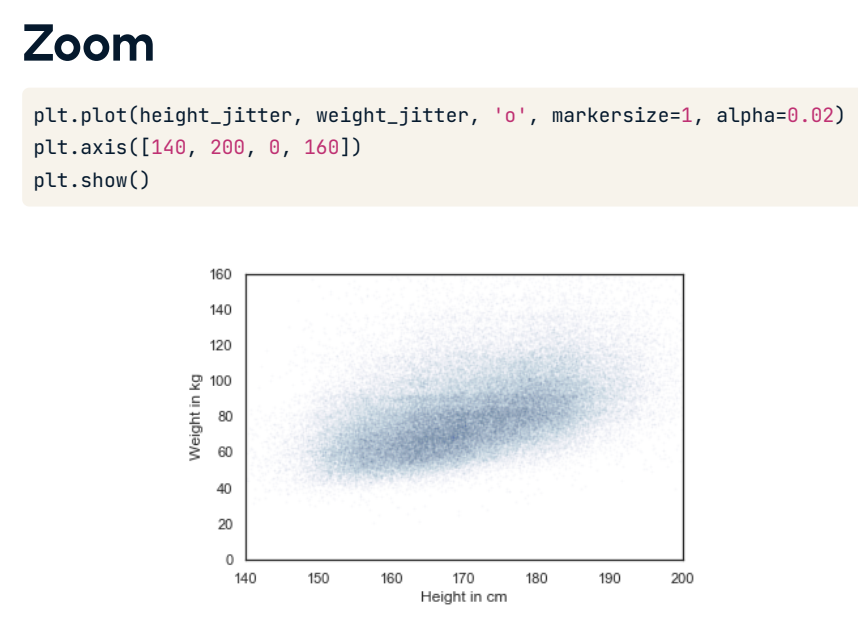

The pyplot function axis() sets the lower and upper bounds for the x- and y-axis; in this case, we plot heights from 140 to 200 centimeters and weights up to 160 kilograms. Here's what it looks like. Finally, we have a reliable picture of the relationship between height and weight.

10. Before and after

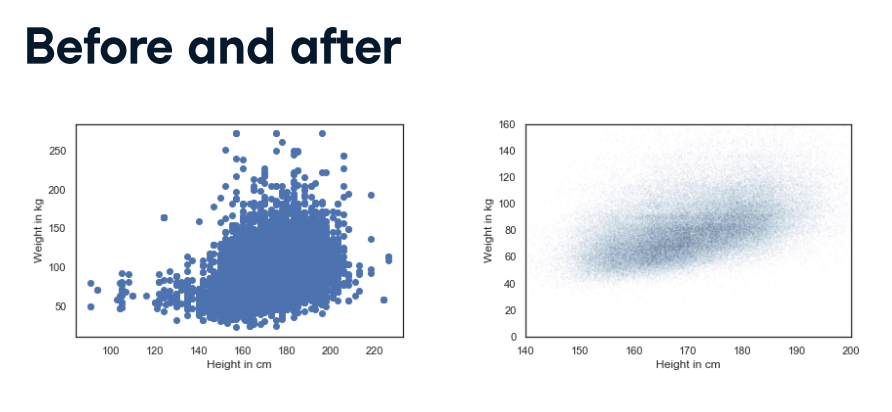

Here's the plot we started with and the one we ended with. Clearly, they are very different, and they suggest different stories about the relationship between these variables. The point of this example is that it takes some effort to make an effective scatter plot.

11. Let's explore!

In the next lesson we'll see other ways to visualize relationships between variables, but first you'll have a chance to explore the relationship between age and weight.

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

brfss = pd.read_hdf('datasets/brfss.hdf5', 'brfss') # Behavioral Risk Factor Surveillance System (BRFSS) 

In [135]:
brfss.head()

SEX   HTM4   WTKG3  INCOME2       _LLCPWT  _AGEG5YR  _VEGESU1  \
96230   2.0  160.0   60.33      8.0   1398.525290       6.0      2.14   
244920  2.0  163.0   58.97      5.0     84.057503      13.0      3.14   
57312   2.0  163.0   72.57      8.0    390.248599       5.0      2.64   
32573   2.0  165.0   74.84      1.0  11566.705300       3.0      1.46   
355929  2.0  170.0  108.86      3.0    844.485450       3.0      1.81   

        _HTMG10   AGE  
96230     150.0  47.0  
244920    160.0  89.5  
57312     160.0  42.0  
32573     160.0  32.0  
355929    160.0  32.0

**Exercise**

**PMF of age**

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a .bar() method to make a bar chart.

The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. 'AGE' contains the midpoint of the bins.

**Instructions**

- Extract the variable 'AGE' from the DataFrame brfss and assign it to age.
- Get the PMF of age and plot it as a bar chart.

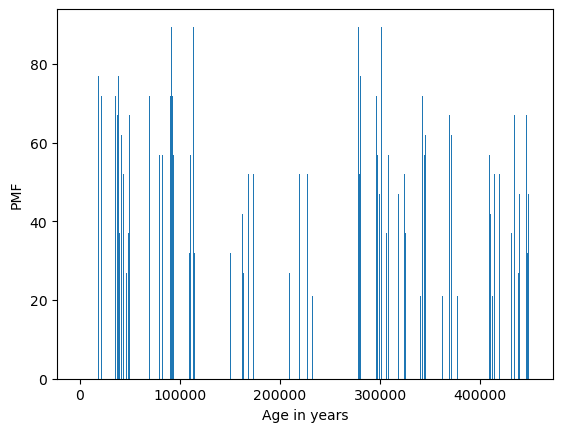

In [136]:
# Extract age
age = brfss["AGE"]

# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar(label='pmf_age')

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

Ok, we're off to a good start. Notice that the last age range is bigger than the others. That's the kind of thing you see when you plot distributions.

**Exercise**

**Scatter plot**

Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

**Instructions**

- Make a scatter plot of weight and age with format string 'o' and alpha=0.1.m

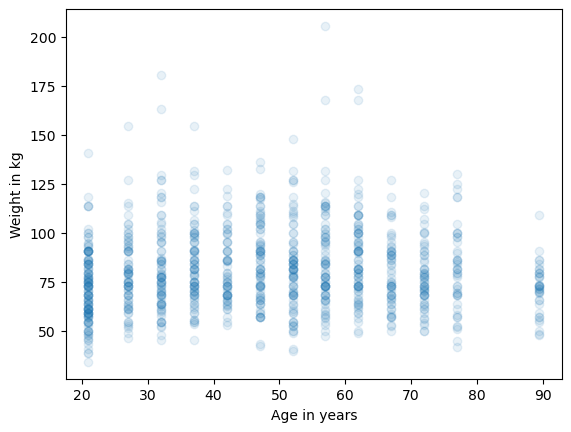

In [139]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, "o", alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

So far so good. By adjusting alpha we can avoid saturating the plot. Next we'll jitter the data to break up the columns.

**Exercise**

**Jittering**

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered height and weight in the video:

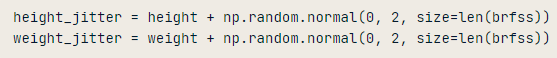

**Instructions**

- Add random noise to age with mean 0 and standard deviation 2.5.
- Make a scatter plot between weight and age with marker size 5 and alpha=0.2. Be sure to also specify 'o'.

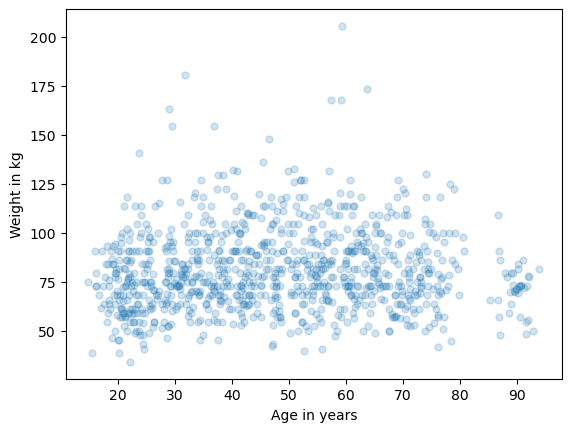

In [140]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, "o", markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

Excellent. By smoothing out the ages and avoiding saturation, we get the best view of the data. But in this case the nature of the relationship is still hard to see. In the next lesson, we'll see some other ways to visualize it.

## <a id="4"></a>
<font color="lightseagreen" size=+2.5><b>4. Multivariate Thinking</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Explore multivariate relationships using multiple regression to describe non-linear relationships and logistic regression to explain and predict binary variables.

## Take Notes

Add notes about the concepts you've learned and code cells with code you want to keep.

_Add your notes here_

In [132]:
# Add your code snippets here